# AZ-204: Develop event-based solutions

In [ ]:
import sys
sys.path.append('./../utils')
import ai

➡️ Answers generated using AI, and grounded in the learn module. Mistakes are possible. Check important info.

In [3]:
%%question
Before going into event or message based solutions: What is the difference between an event and a message? Why is this important?

An **event** represents a **change in state** or an occurrence that has happened, like "file uploaded" or "payment processed." It's a **fact** and doesn't expect a direct response.

A **message** is a piece of **data** or an **instruction** sent from one component to another, often requiring a **response** or **action**. It's more about **communication** between systems.

Understanding the difference is crucial for designing systems that handle **asynchronous processes**, ensuring components are correctly **decoupled** and **scalable**.

**Event**:
- Something happened: a state change
- data (payload)
- Multiple subscribers
- A trigger
- Publisher doesn't expect a direct response.
- IOT devices (temperature) 6, 6.1, 5.9, (stream) -> analyze over time (Azure Stream Analytics)

**Message**:
- Data (payload)
- Consumer/Listener
- Deal with it only once (queue / topics)
- Publisher has an expectation that the message will be handled
- Contract in place
- Guarantee on ordering

## Explore Azure Event Grid

In [4]:
%%learn
https://learn.microsoft.com/en-us/training/modules/azure-event-grid/

https://learn.microsoft.com/en-us/training/modules/azure-event-grid/1-introduction
https://learn.microsoft.com/en-us/training/modules/azure-event-grid/2-event-grid-overview
https://learn.microsoft.com/en-us/training/modules/azure-event-grid/3-event-grid-schema
https://learn.microsoft.com/en-us/training/modules/azure-event-grid/4-event-grid-delivery-retry
https://learn.microsoft.com/en-us/training/modules/azure-event-grid/5-authorize-access-event-grid
https://learn.microsoft.com/en-us/training/modules/azure-event-grid/6-webhook-event-delivery
https://learn.microsoft.com/en-us/training/modules/azure-event-grid/7-event-grid-filtering
https://learn.microsoft.com/en-us/training/modules/azure-event-grid/8-event-grid-custom-events


('', 'https://learn.microsoft.com/en-us/training/modules/azure-event-grid/\n')

In [5]:
%%question
Explain a scenario where you would use Azure Event Grid in the context of Azure resources

**Scenario**: Automating Image Processing in Azure Storage

**Context**: Suppose you have an application that uploads images to Azure Blob Storage. After an image is uploaded, you want to automatically process the image, such as generating thumbnails or applying filters, without having to constantly check for new uploads.

**Solution with Azure Event Grid**:

1. **Event Source**: Use Azure Blob Storage as the **event source**. Configure it to raise an event whenever a new blob is created in a specific container.

2. **Event Handling**: Use Azure Event Grid to listen for the "Blob Created" event. Event Grid will efficiently route this event to the subscribed endpoints without the need for polling.

3. **Event Subscription**: Create an **event subscription** to your Azure Function or Logic App. This function or app will be triggered whenever the "Blob Created" event occurs.

4. **Event Processing**: The Azure Function or Logic App processes the image. This could involve generating a thumbnail, applying image transformations, or storing metadata in a database.

By using Azure Event Grid, you achieve a **serverless, event-driven architecture** that automates image processing whenever a new image is uploaded, without manual intervention. This setup is highly scalable and cost-effective, as resources are only used when events occur.

In [6]:
%%question
Explain a scenario where you would use Azure Event Grid in the context of a custom line of business application

**Scenario**: Order Processing System for an E-commerce Platform

**Context**: Imagine you have a custom line of business application that handles orders for an e-commerce platform. When a customer places an order, you want various services to react to this event, such as inventory management, shipping, and billing systems, without tightly coupling these services.

**Solution with Azure Event Grid**:

1. **Event Publisher**: The order processing application publishes an event to Azure Event Grid whenever a new order is placed. This event includes details such as order ID, customer information, and items purchased.

2. **Event Topics**: Create a custom **topic** in Azure Event Grid to categorize these order events. This topic acts as a channel through which related events are published.

3. **Event Subscriptions**: Various microservices subscribe to the order event topic. For example:
   - **Inventory Service** subscribes to update stock levels based on the order.
   - **Shipping Service** subscribes to initiate the packaging and delivery process.
   - **Billing Service** subscribes to generate an invoice and process payment.

4. **Event Handling**: Each service processes the event independently. This decoupled architecture allows for scalable and flexible handling of order events.

5. **Benefits**: Using Azure Event Grid enables the e-commerce platform to have a **real-time, scalable, and loosely coupled system**, where each service can be developed, deployed, and scaled independently. This improves the overall efficiency and reliability of the order processing workflow.

In [7]:
%%question
Why do we need Azure Event Grid when we have Azure Service Bus and Azure Event Hub? Compare and contrast the three services in a table

Certainly! Here's a comparison of **Azure Event Grid**, **Azure Service Bus**, and **Azure Event Hubs**:

| Feature/Aspect         | **Azure Event Grid**                                    | **Azure Service Bus**                                  | **Azure Event Hubs**                                    |
|------------------------|---------------------------------------------------------|--------------------------------------------------------|---------------------------------------------------------|
| **Purpose**            | Event routing and notification for real-time processing | Enterprise messaging with complex messaging patterns    | Ingesting and processing large volumes of telemetry data |
| **Use Case**           | Event-driven architectures, serverless apps             | Order processing, workflow management                   | Telemetry streaming, data logging                        |
| **Message Model**      | Event-based (lightweight, often stateless)              | Message-based (stateful, with message guarantees)       | Event-based (high-throughput, streaming)                 |
| **Message Size**       | Up to 1 MB                                              | Up to 256 KB                                            | Up to 1 MB per partition                                 |
| **Latency**            | Low latency, near real-time                             | Moderate latency with guaranteed delivery               | Low latency, high throughput                             |
| **Delivery**           | At least once                                           | At least once, with ordering and sessions               | At least once, partitioned                               |
| **Features**           | Supports push/pull, filtering, and event TTL            | Advanced messaging features like topics, queues         | Partitioning, capture, and offset management             |
| **Integration**        | Easy integration with Azure services and webhooks       | Integration with Azure services and on-premises systems | Integration with Azure Stream Analytics and other tools  |
| **Scalability**        | Highly scalable with automatic scaling                  | Scalable but requires manual scaling configurations     | Highly scalable, designed for massive data ingestion     |
| **Security**           | Role-based access control, event subscriptions          | Advanced security features with claims and brokers      | Role-based access control, SAS tokens                    |

**Key Differences**:
- **Azure Event Grid** is ideal for lightweight, reactive, event-driven solutions that require real-time processing and integration with multiple Azure services.
- **Azure Service Bus** is suited for complex enterprise messaging scenarios that require reliable and ordered message delivery, transactions, and workflow patterns.
- **Azure Event Hubs** is optimized for high-throughput streaming, making it perfect for scenarios involving massive data ingestion, like IoT telemetry or application logs.

Each service has its unique strengths and is suited for different architectural requirements. Choosing the right service depends on your specific use case, such as whether you need complex message handling, event distribution, or high-throughput data ingestion.

In [8]:
%%question
What Azure Resources do support Azure Event Grid as a source? Provide also a few examples of event types it supports. Output in table format.

Certainly! Here is a table listing some Azure resources that support Azure Event Grid as a source, along with examples of event types they support:

| **Azure Resource**         | **Example Event Types**                                |
|----------------------------|--------------------------------------------------------|
| **Azure Blob Storage**     | Blob Created, Blob Deleted                             |
| **Azure Resource Groups**  | Resource Write Success, Resource Delete Success        |
| **Azure Subscriptions**    | Subscription Write Success, Subscription Delete Success|
| **Azure Event Hubs**       | Capture File Created                                   |
| **Azure IoT Hub**          | Device Connected, Device Disconnected                  |
| **Azure Service Bus**      | Active Messages Available with No Listeners            |
| **Azure Key Vault**        | Secret Near Expiry, Secret Expired                     |
| **Azure App Service**      | Slot Swap Completed, Slot Swap Started                 |
| **Azure Maps**             | Geofence Entered, Geofence Exited                      |
| **Azure Machine Learning** | Run Completed, Run Failed                              |

This table provides a snapshot of the integration capabilities of Azure Event Grid, allowing you to react to a variety of state changes and operations across different Azure services.

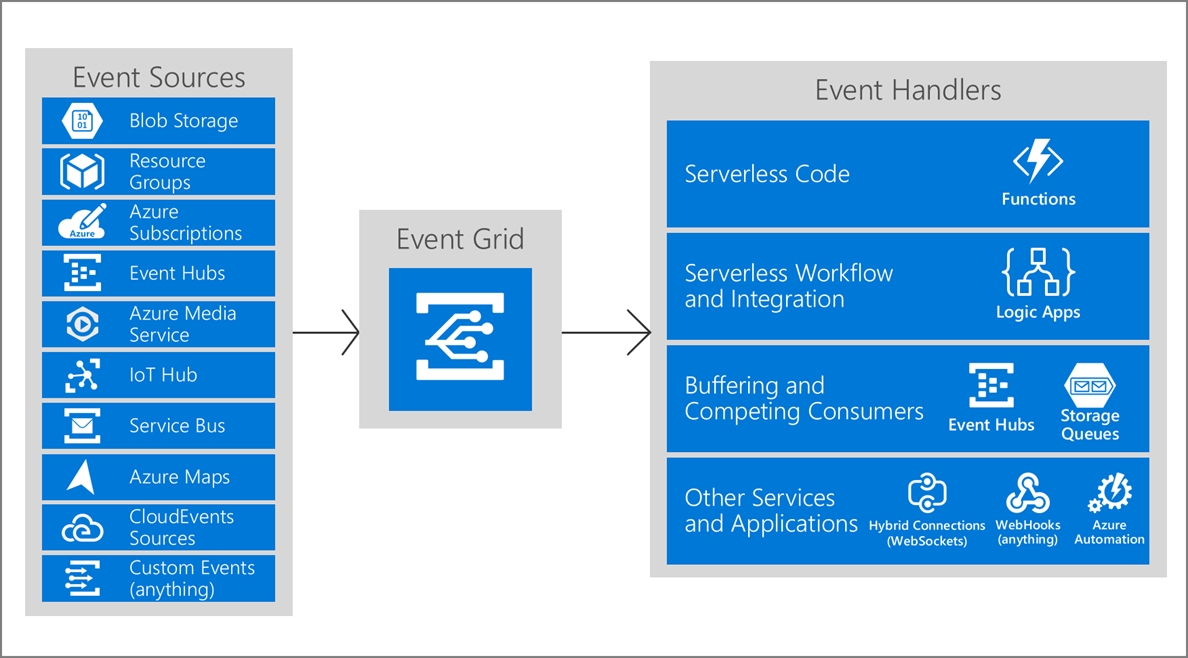

In [9]:
%%question
What if my azure function is behind a private endpoint. Can event grid still use it as a destination?

Yes, Azure Event Grid can still target an Azure Function that is behind a private endpoint, but there are additional configurations you need to perform to ensure successful communication:

1. **Private DNS Zone**: Ensure a private DNS zone is configured to resolve the private endpoint's DNS name within the virtual network (VNet) where the function app is hosted. This allows services within the VNet to resolve the function app's private IP address.

2. **Network Configuration**: The Event Grid's underlying infrastructure needs to access the function app via the private endpoint. You'll need to ensure that the necessary network rules and routes are configured to allow traffic from Event Grid to the function app.

3. **VNet Integration**: Ensure that the Azure Function is integrated with a VNet, and that VNet has the necessary configurations to accept traffic from Event Grid.

4. **Authorization and Firewall Rules**: Verify that the function app's firewall settings allow access from Azure Event Grid. You might need to configure service endpoints or allow specific IP ranges.

5. **Managed Identity**: Use managed identities to authenticate and authorize access, ensuring that Event Grid has the necessary permissions to invoke the Azure Function.

These configurations ensure that despite being behind a private endpoint, the Azure Function can still receive events from Azure Event Grid.

In [10]:
%%question
What are events, event sources, topics, event subscriptions and event handlers. Provide a brief explanation of each term in table format

Certainly! Here's a brief explanation of each term in table format:

| **Term**              | **Description**                                                                                   |
|-----------------------|---------------------------------------------------------------------------------------------------|
| **Events**            | The smallest unit of information that indicates something happened in a system, like a state change or an update. Each event includes data relevant to the occurrence. |
| **Event Sources**     | The originators or producers of events. These could be Azure services, applications, or external systems that generate events when specific actions occur. |
| **Topics**            | Channels or endpoints where events are sent. They act as entry points for events into Azure Event Grid, organizing events based on categories or types. |
| **Event Subscriptions** | Definitions that specify which events on a topic should be sent to an endpoint. They include filters to determine which events are of interest and where they should be delivered. |
| **Event Handlers**    | The destination or endpoint that processes the events. Event handlers can be Azure services like Azure Functions, Logic Apps, or custom webhooks that perform actions based on the event data. |

These components work together in Azure Event Grid to enable efficient event-driven architectures, allowing systems to react to changes and events in real-time.

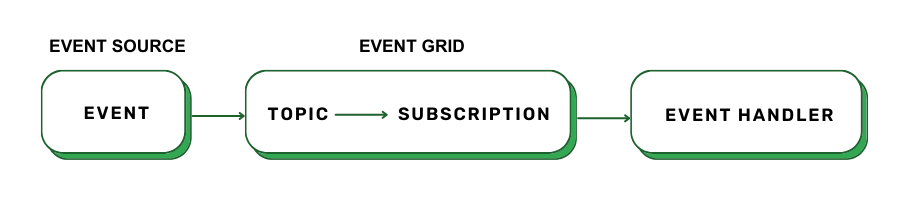

In [11]:
%%question
Share an example of an event JSON for a file uploaded to Azure Blob Storage

Certainly! Here's an example of an event JSON for a file uploaded to Azure Blob Storage:

```json
[
  {
    "topic": "/subscriptions/{subscription-id}/resourceGroups/{resource-group}/providers/Microsoft.Storage/storageAccounts/{storage-account}",
    "subject": "/blobServices/default/containers/{container-name}/blobs/{blob-name}",
    "eventType": "Microsoft.Storage.BlobCreated",
    "eventTime": "2023-10-05T12:34:56.789Z",
    "id": "{event-id}",
    "data": {
      "api": "PutBlob",
      "clientRequestId": "abcd1234-5678-90ab-cdef-1234567890ab",
      "requestId": "12345678-90ab-cdef-1234-567890abcdef",
      "eTag": "0x8D1234567890ABC",
      "contentType": "application/octet-stream",
      "contentLength": 1024,
      "blobType": "BlockBlob",
      "url": "https://{storage-account}.blob.core.windows.net/{container-name}/{blob-name}",
      "sequencer": "0000000000000000000000000000000000000000000000000000000000000000"
    },
    "dataVersion": "",
    "metadataVersion": "1",
    "eventTypeVersion": "1"
  }
]
```

In this JSON:

- **topic**: Specifies the Azure resource path where the event originates.
- **subject**: Indicates the specific resource within the topic that the event is about.
- **eventType**: Specifies the type of event, in this case, "Microsoft.Storage.BlobCreated".
- **eventTime**: The time when the event was generated.
- **data**: Contains detailed information about the event, such as the action performed (`PutBlob`), request IDs, and blob properties like `contentType` and `contentLength`.
- **id**, **dataVersion**, and **metadataVersion**: Provide additional identifiers and versioning information for the event.

In [12]:
%%question
What happens if an event cannot be delivered?

If an event cannot be delivered in Azure Event Grid, the following steps are typically taken:

1. **Retry Policy**: Azure Event Grid implements a retry policy to attempt redelivery of the event. This includes multiple attempts with an exponential backoff strategy to handle transient issues.

2. **Dead-lettering**: If the event cannot be delivered after all retry attempts, and if dead-lettering is configured, the event is moved to a dead-letter location, such as an Azure Storage account. This allows you to review and handle undelivered events later.

3. **Dropping Events**: If dead-lettering is not configured, and the event cannot be delivered after retries, it may be dropped.

4. **Error Logging**: Azure Event Grid logs errors for undelivered events, which can be monitored to identify and troubleshoot issues.

By using dead-lettering and monitoring, you can better manage and respond to events that fail to be delivered.

In [13]:
%%question
Who can subscribe to these events?

Anyone with the appropriate permissions can subscribe to events in Azure Event Grid. This typically includes:

1. **Azure Users/Accounts**: Users who have been granted the necessary permissions within an Azure subscription through Azure Role-Based Access Control (RBAC).

2. **Applications**: Applications or services with managed identities or service principals that have been authorized to create event subscriptions.

3. **Organizations**: Teams or departments within an organization that have access to the Azure resources and need to respond to specific events.

To subscribe to events, the entity (user or application) must have the necessary access rights on the resource emitting the events, such as the **Microsoft.EventGrid/EventSubscriptions/Write** permission. This ensures that only authorized users and services can create subscriptions and receive event data.

In [14]:
%%question
Which RBAC permissions are required to create an event subscription?

To create an event subscription in Azure Event Grid, you typically need the following RBAC permission:

- **Microsoft.EventGrid/EventSubscriptions/Write**: This permission allows creating an event subscription on the specified resource.

Additionally, you may need other permissions depending on the specific resource you are subscribing to:

- **Resource Permissions**: You need write access on the resource that is the event source. This could be a system topic or a custom topic, meaning you need permissions on the Azure resource itself (like a storage account or an event grid topic) to create a subscription.

Roles that commonly have these permissions include:

- **Event Grid Contributor**: Can create and manage Event Grid resources, including event subscriptions.
- **Owner** or **Contributor** on the resource: These roles inherently have the necessary permissions to manage resources, including creating event subscriptions.

Ensure you have the appropriate role assignments on the resource before attempting to create an event subscription.

In [15]:
%%question
Can you explain the concept of a handshake when working with webhooks?

Certainly! The concept of a **handshake** when working with webhooks, particularly with Azure Event Grid, refers to the process of verifying and establishing a connection between the event source (Event Grid) and the event handler (webhook endpoint). This handshake ensures that the webhook is correctly configured and that it genuinely intends to receive events. Here's how it typically works:

1. **Subscription Validation Event**: When you create a webhook event subscription, Azure Event Grid sends a **subscription validation event** to the specified webhook endpoint. This event contains a validation code or a validation URL.

2. **Synchronous Handshake**: The webhook endpoint must respond to this validation event by echoing back the validation code in the response. This confirms that the endpoint is ready to receive events.

3. **Asynchronous Handshake**: In some cases, the webhook might need to perform an asynchronous handshake. The validation event includes a URL that the endpoint must call (usually a GET request) to complete the validation within a specified time frame (e.g., 5 minutes).

4. **Successful Validation**: If the handshake is successful, Event Grid starts delivering events to the webhook endpoint. If the handshake fails (e.g., due to a timeout or incorrect response), the subscription is not activated.

The handshake process helps prevent unauthorized endpoints from receiving events and ensures that the webhook is correctly configured and responsive.

In [16]:
%%question
Can you share an example of a C# custom webhook that performs this verification?

Certainly! Below is a simple example of a C# custom webhook implemented using ASP.NET Core that performs the subscription validation for Azure Event Grid:

```csharp
using Microsoft.AspNetCore.Mvc;
using Microsoft.Extensions.Logging;
using Newtonsoft.Json.Linq;

namespace WebhookExample.Controllers
{
    [ApiController]
    [Route("api/[controller]")]
    public class EventGridController : ControllerBase
    {
        private readonly ILogger<EventGridController> _logger;

        public EventGridController(ILogger<EventGridController> logger)
        {
            _logger = logger;
        }

        [HttpPost]
        public IActionResult Post([FromBody] JObject eventGridEvent)
        {
            _logger.LogInformation("Received Event Grid event: {Event}", eventGridEvent);

            // Handle the subscription validation event
            if (eventGridEvent != null && eventGridEvent["eventType"]?.ToString() == "Microsoft.EventGrid.SubscriptionValidationEvent")
            {
                var validationCode = eventGridEvent["data"]["validationCode"]?.ToString();
                _logger.LogInformation("Subscription validation event received. ValidationCode: {ValidationCode}", validationCode);

                // Return the validation response
                var response = new
                {
                    validationResponse = validationCode
                };

                return Ok(response);
            }

            // Handle other events (e.g., the ones you actually care about)
            // Process the event data as needed

            // Return a 200 OK response
            return Ok();
        }
    }
}
```

### Explanation:

- **Subscription Validation**: The webhook checks if the incoming event is a `SubscriptionValidationEvent`. This is the event sent by Azure Event Grid during the initial handshake.
  
- **Validation Code**: If a subscription validation event is detected, it extracts the `validationCode` from the event data.

- **Response**: The webhook responds with a JSON object containing the `validationResponse`, echoing back the `validationCode`. This completes the handshake and confirms the webhook is ready to receive actual events.

- **Logging**: For demonstration, the webhook logs incoming events and validation details to help with debugging and monitoring.

This example assumes a basic setup with ASP.NET Core and requires you to have the necessary packages and configurations in your project.

In [17]:
%%question
I want to setup a event grid subscriber that listens for events from an Azure Blob Storage account. 
I only want to be informed when MP4 files are uploaded in the videos container.
What steps would I follow?

To set up an Azure Event Grid subscriber that listens for MP4 file uploads in a specific container within Azure Blob Storage, you can follow these steps:

1. **Create an Azure Blob Storage Account**:
   - Ensure you have an Azure Blob Storage account with a container named `videos`.

2. **Create an Event Grid Subscription**:
   - Navigate to the Azure Portal.
   - Go to your Blob Storage account.
   - Under the "Event Grid" section, select "Events."
   - Click on "Add Event Subscription."

3. **Configure the Event Subscription**:
   - **Name**: Enter a name for your event subscription.
   - **Endpoint Type**: Choose the endpoint type where you want to send the events, such as an Azure Function, Logic App, or Webhook.
   - **Endpoint Details**: Provide the necessary details for your chosen endpoint.

4. **Set Up Filters**:
   - **Event Type**: Select "Blob Created" to listen for new blob uploads.
   - **Subject Filters**: 
     - **Subject Begins With**: Set this to `/blobServices/default/containers/videos/` to filter events from the `videos` container.
     - **Subject Ends With**: Set this to `.mp4` to filter events only for MP4 files.

5. **Create the Subscription**:
   - Review your settings and click "Create" to finalize the event subscription.

6. **Verify and Test**:
   - Upload an MP4 file to the `videos` container in your Blob Storage account.
   - Check your configured endpoint to verify it receives the event.

By following these steps, you can ensure that your event grid subscription is set up to specifically notify you when an MP4 file is uploaded to the `videos` container.

In [18]:
%%question
Can you provide the azure function c# code to listen for this event?

Certainly! Below is a simple Azure Function written in C# that listens for events from Azure Event Grid. This function is designed to react specifically to events when MP4 files are uploaded to the `videos` container in an Azure Blob Storage account:

```csharp
using System.Threading.Tasks;
using Microsoft.AspNetCore.Mvc;
using Microsoft.Azure.WebJobs;
using Microsoft.Azure.WebJobs.Extensions.Http;
using Microsoft.AspNetCore.Http;
using Microsoft.Extensions.Logging;
using Newtonsoft.Json;
using Newtonsoft.Json.Linq;
using System.Collections.Generic;

public static class EventGridTriggerFunction
{
    [FunctionName("EventGridTriggerFunction")]
    public static async Task<IActionResult> Run(
        [HttpTrigger(AuthorizationLevel.Function, "post", Route = null)] HttpRequest req,
        ILogger log)
    {
        log.LogInformation("Event Grid trigger function processed a request.");

        // Read the request body
        string requestBody = await new StreamReader(req.Body).ReadToEndAsync();
        var events = JsonConvert.DeserializeObject<List<EventGridEvent>>(requestBody);

        foreach (var eventGridEvent in events)
        {
            log.LogInformation($"Received event: {eventGridEvent.Id}");
            
            // Check if it's a BlobCreated event
            if (eventGridEvent.EventType == "Microsoft.Storage.BlobCreated")
            {
                // Parse the event data
                var data = (JObject)eventGridEvent.Data;
                string url = data["url"]?.ToString();

                // Check if the blob is in the "videos" container and is an MP4 file
                if (url != null && url.Contains("/videos/") && url.EndsWith(".mp4"))
                {
                    log.LogInformation($"MP4 file uploaded: {url}");
                    // Add custom logic here, such as processing the uploaded MP4 file
                }
            }
        }

        return new OkResult();
    }

    public class EventGridEvent
    {
        public string Id { get; set; }
        public string EventType { get; set; }
        public JObject Data { get; set; }
    }
}
```

### Explanation:

- **HTTP Trigger**: The Azure Function uses an HTTP trigger to listen for incoming Event Grid events. Ensure your function app is configured to accept Event Grid events.

- **Event Parsing**: The function deserializes the incoming request body into a list of `EventGridEvent` objects.

- **Event Filtering**: The function checks each event to determine if it is of type `Microsoft.Storage.BlobCreated`. It then examines the URL in the event data to verify that the file is located in the `videos` container and has an MP4 extension.

- **Logging**: The function logs relevant information, like the event ID and URL of the uploaded MP4 file. You can add custom logic where indicated to further process the MP4 files.

- **Security**: Ensure the function is secured appropriately (e.g., using function keys or other authentication methods).

This example assumes you have set up your Azure Function app and configured it to receive events from Azure Event Grid.

## Explore Azure Event Hubs

In [19]:
%%learn
https://learn.microsoft.com/en-us/training/modules/azure-event-hubs/

https://learn.microsoft.com/en-us/training/modules/azure-event-hubs/1-introduction
https://learn.microsoft.com/en-us/training/modules/azure-event-hubs/2-event-hubs-overview
https://learn.microsoft.com/en-us/training/modules/azure-event-hubs/3-event-hubs-capture
https://learn.microsoft.com/en-us/training/modules/azure-event-hubs/4-event-processing
https://learn.microsoft.com/en-us/training/modules/azure-event-hubs/5-event-hubs-authentication-authorization
https://learn.microsoft.com/en-us/training/modules/azure-event-hubs/6-event-hubs-programming-guide


('', 'https://learn.microsoft.com/en-us/training/modules/azure-event-hubs/\n')

In [20]:
%%question
Explain the difference between Azure Event Hubs and Azure Event Grid

**Azure Event Hubs** and **Azure Event Grid** are both services in Azure used for handling events, but they serve different purposes and are designed for different use cases:

1. **Azure Event Hubs**:
   - **Purpose**: Primarily a **big data streaming platform** and event ingestion service. It is designed to **ingest and process large volumes of events** in real-time.
   - **Use Cases**: Ideal for scenarios where you need to handle telemetry and event stream processing from devices, applications, or services, such as IoT telemetry or application logging.
   - **Features**: Supports high throughput, low latency, and the ability to capture data for batch processing. It uses a **partitioned consumer model** to enable parallel processing of events.
   - **Integration**: Compatible with Apache Kafka and integrates well with Azure Stream Analytics, Azure Functions, and other real-time processing frameworks.

2. **Azure Event Grid**:
   - **Purpose**: An **event routing service** that enables developers to build event-driven architectures. It focuses on **distributing events** to multiple services in a scalable and efficient manner.
   - **Use Cases**: Ideal for reacting to events from various Azure services and custom applications, such as triggering workflows, automating processes, or integrating applications.
   - **Features**: Provides a **publish-subscribe model** with support for advanced filtering, push delivery of events, and integration with various Azure services like Logic Apps, Azure Functions, and third-party services.
   - **Integration**: Supports CloudEvents schema for interoperability and can easily integrate with webhooks and other HTTP endpoints.

In summary, **Event Hubs** is best suited for high-throughput data ingestion and stream processing, while **Event Grid** is ideal for building event-driven architectures with event-based communication between services.

In [21]:
%%question
What is a namespace in the context of Azure Event Hubs?

A **namespace** in the context of **Azure Event Hubs** acts as a **logical container** for one or more event hubs. It provides a way to manage and organize related event hubs under a single umbrella. Here are some key points about namespaces:

- **Management**: The namespace is the level at which you manage settings and configurations such as security, network isolation, and geo-disaster recovery.
- **Isolation**: It helps in isolating resources and managing access control. Each namespace can have its own set of authentication rules and policies.
- **Capacity**: You allocate streaming capacity (throughput units or processing units) at the namespace level, which can be shared among the event hubs within that namespace.
- **Flexibility**: A single namespace can contain multiple event hubs or Kafka topics, allowing you to handle different streams of data or workloads within the same namespace.

In essence, a namespace is a fundamental organizational and management unit in Azure Event Hubs, enabling you to efficiently manage multiple event hubs and their settings.

In [22]:
%%question
What are the different pricing tiers for Azure Event Hubs? What are the differences and limitations? Output in table format

Certainly! Here's a table that outlines the different pricing tiers for **Azure Event Hubs**, along with their key differences and limitations:

| **Pricing Tier**  | **Description**                                                                 | **Key Differences & Limitations**                                                                                  |
|-------------------|---------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------|
| **Basic**         | Entry-level tier for simple event streaming scenarios.                          | - Limited to 20 throughput units per namespace.<br>- No features for event retention beyond 24 hours.<br>- No Capture feature.  |
| **Standard**      | Suitable for most production workloads requiring additional features.           | - Supports up to 20 throughput units per namespace.<br>- Supports Event Hubs Capture.<br>- Offers longer event retention (up to 7 days).  |
| **Premium**       | Designed for mission-critical workloads with higher throughput and consistency. | - Supports up to 40 throughput units per namespace.<br>- Provides more predictable latency and higher availability.<br>- Enhanced security features. |
| **Dedicated**     | For large-scale, enterprise-grade event streaming solutions.                    | - Offers a dedicated cluster with a single tenant, ensuring consistent performance.<br>- Supports unlimited throughput and retention. |

### Key Considerations:
- **Throughput Units**: Each tier has different limits on throughput units, which determine the ingress and egress capacity.
- **Features**: Higher tiers like Premium and Dedicated offer advanced features such as enhanced security, higher availability, and longer retention periods.
- **Capture**: The ability to capture and store event data automatically is available starting from the Standard tier.
- **Scale**: The Dedicated tier provides a dedicated environment for enterprises with extensive scalability needs.

Choosing the right tier depends on your specific requirements such as throughput, retention needs, and feature set.

In [23]:
%%question
What are throughput units?

**Throughput units** in Azure Event Hubs define the capacity allocated for data ingestion and processing. Each throughput unit provides a specific amount of ingress and egress capability:

- **Ingress Capacity**: Each throughput unit allows up to **1 MB per second** or **1,000 events per second** for data ingress into the event hub.
  
- **Egress Capacity**: Each throughput unit supports double the ingress capacity for data egress, meaning **2 MB per second** or **2,000 events per second** for outgoing data.

### Key Points:
- **Scalability**: You can scale the number of throughput units for an Event Hubs namespace to handle varying loads. For the Basic and Standard tiers, you can configure from 1 to 20 throughput units, while the Premium tier supports up to 40.
- **Cost**: The cost of using Azure Event Hubs is partly based on the number of throughput units you allocate, so it's essential to choose the right number based on your workload needs.
- **Throttling**: If your workload exceeds the allocated throughput units, Azure Event Hubs will throttle the excess traffic to ensure that the allocated capacity is not exceeded.

Throughput units help ensure that you have the necessary capacity for your event streaming applications, allowing you to manage and scale your data ingestion and processing efficiently.

In [25]:
1000 * 60 * 60 * 24


86400000

In [26]:
%%question
If I send a batch of events to an Event Hub - does the 1000 events per second still apply?

Yes, the **1,000 events per second** limit per throughput unit applies to both individual events and batches of events. When you send a batch of events to an Event Hub, the batch counts as multiple individual events for the purpose of the throughput unit limit.

### Key Points:
- **Batching Advantage**: Sending events in batches can improve efficiency by reducing the overhead associated with network calls, but it does not change the throughput unit limitations.
- **Event Count**: Each event within a batch is counted separately towards the 1,000 events per second limit per throughput unit.
- **Size Consideration**: The total size of the batch must also adhere to the 1 MB per second ingress limit per throughput unit.

By batching events, you can optimize performance and reduce costs, but you still need to ensure that the number of events and the total data size fit within the constraints of your allocated throughput units.

In [27]:
%%question
What is partitioning in the context of Azure Event Hubs? Do I need to do something from publisher or consumer side?

**Partitioning** in the context of Azure Event Hubs is a mechanism to divide a single event hub into multiple segments, known as **partitions**. Each partition acts as a separate sequence of events, which allows for parallel processing and scalability of event data ingestion and consumption.

### Key Points:

- **Parallel Processing**: By partitioning, you can enable parallel processing of events by different consumers. Each partition can be read by different consumers independently, which helps in scaling out the processing.

- **Order Preservation**: Within a partition, the order of events is preserved. If order is important for your application, ensure that events are sent to the same partition.

- **Load Balancing**: Partitions help balance the load among consumers. If you have multiple consumers, they can read from different partitions simultaneously, improving throughput.

### Publisher Side Considerations:
- As a publisher, you can choose to send events to specific partitions by using a **partition key**. This key determines the partition to which an event is routed. If you don't specify a partition key, Event Hubs will assign events to partitions in a round-robin fashion.

### Consumer Side Considerations:
- On the consumer side, your application needs to handle reading from multiple partitions if you want to process all events in the event hub. This typically involves implementing logic to read from each partition and track the offset of the last processed event.

In summary, partitioning is a crucial feature for scaling and managing event data in Azure Event Hubs. While you don't necessarily need to manually assign partitions, understanding and leveraging partitioning can significantly enhance the performance and reliability of your event processing solutions.

In [28]:
%%question
How many partitions can an Event Hub have? Can I change it after creation?

An **Event Hub** can have between **1 and 32 partitions** by default. However, if you need more partitions, you can request an increase through Azure support.

### Key Points:

- **Initial Configuration**: The number of partitions is set when you create the Event Hub. It's crucial to estimate the number of partitions you'll need based on your expected workload and processing requirements.

- **Changing Partitions**: Once an Event Hub is created, you **cannot change the number of partitions**. This is because partitions are integral to how data is distributed and consumed within Event Hubs.

If you anticipate needing more partitions, it's best to plan and configure them at the time of creation. If your needs change dramatically, you might need to create a new Event Hub with the desired number of partitions and migrate your applications.

In [29]:
%%question
What is a consumer group and how does it relate to the partitioning concept?

A **consumer group** in Azure Event Hubs is a view or state of an entire event hub. Consumer groups enable multiple consuming applications to have separate views of the event stream, allowing them to independently read and process events from the same event hub.

### Relation to Partitioning:

- **Independent Consumption**: Each consumer group maintains its own offset or position within each partition. This means multiple consumer groups can process the same events separately and independently, without interfering with each other.

- **Parallel Processing**: Within a consumer group, different consumer instances can read from different partitions in parallel. This is key to scaling out the processing of events, as each partition can be read independently.

- **Isolation**: Consumer groups provide isolation between different consuming applications or services. This is useful when different teams or services need to process the same event data differently or at different rates.

### Key Points:

- **Default and Custom Groups**: When you create an event hub, a default consumer group is provided, but you can create additional consumer groups as needed.

- **State Management**: Each consumer group tracks its own state (offsets) for each partition, allowing it to resume processing from where it left off in case of failures or restarts.

Consumer groups are essential for scenarios where multiple applications need to process the same stream of events independently, providing flexibility and scalability in how data is consumed from Event Hubs.

In [30]:
%%question
Who manages this offset? Do I need to store this in my code?

The **offset** in Azure Event Hubs is managed by the consumer application, but you don't need to manually store it in your code. Here's how it typically works:

- **Event Processor Client**: If you use the **Event Processor Client** (available in Azure Event Hubs SDKs for .NET, Java, Python, etc.), the client automatically manages offsets for you. It stores offsets in a **checkpoint store**, such as Azure Blob Storage, so you don't have to handle them manually.

- **Checkpointing**: The process of recording the last successfully processed event's offset is known as **checkpointing**. This ensures that if a consumer restarts or fails, it can resume processing from the correct position.

- **Custom Handling**: If you're not using the Event Processor Client or similar abstractions, you may need to handle offsets manually. This involves reading the offset from each partition, processing events, and then writing the offset back to a persistent store of your choice.

Using the Event Processor Client is recommended for most scenarios because it simplifies offset management and provides built-in support for checkpointing and load balancing across partitions.

In [31]:
%%question
Share an example of C# code that sends events to an Event Hub

Certainly! Below is a simple example of C# code that sends events to an Azure Event Hub using the Azure.Messaging.EventHubs library:

```csharp
using System;
using System.Text;
using System.Threading.Tasks;
using Azure.Messaging.EventHubs;
using Azure.Messaging.EventHubs.Producer;

class Program
{
    private const string connectionString = "<Your Event Hubs namespace connection string>";
    private const string eventHubName = "<Your Event Hub name>";

    static async Task Main(string[] args)
    {
        // Create a producer client that you can use to send events to an event hub
        await using (var producerClient = new EventHubProducerClient(connectionString, eventHubName))
        {
            // Prepare a batch of events to send to the event hub
            using EventDataBatch eventBatch = await producerClient.CreateBatchAsync();

            // Create and add a few events to the batch
            eventBatch.TryAdd(new EventData(Encoding.UTF8.GetBytes("First event")));
            eventBatch.TryAdd(new EventData(Encoding.UTF8.GetBytes("Second event")));
            eventBatch.TryAdd(new EventData(Encoding.UTF8.GetBytes("Third event")));

            // Send the batch of events to the event hub
            await producerClient.SendAsync(eventBatch);

            Console.WriteLine("A batch of 3 events has been published.");
        }
    }
}
```

### Explanation:

- **Connection String**: Replace `<Your Event Hubs namespace connection string>` with your Event Hubs namespace connection string.
- **Event Hub Name**: Replace `<Your Event Hub name>` with the name of your Event Hub.
- **EventHubProducerClient**: This client is used to produce and send events to the Event Hub.
- **EventDataBatch**: Batches events for efficient sending. It helps ensure that the events fit within the size constraints of the Event Hub.
- **EventData**: Represents the event data being sent. Here, simple text messages are converted to bytes and sent as events.
- **SendAsync**: Sends the batch of events to the Event Hub.

This example demonstrates how to efficiently send a batch of events to an Azure Event Hub using the Azure SDK for .NET. Make sure to install the `Azure.Messaging.EventHubs` NuGet package in your project to use this code.

In [32]:
%%question
Share an example of a C# code that receives events from an Event Hub with a consumer group

Certainly! Below is a simple example of C# code that receives events from an Azure Event Hub using a consumer group. This example uses the `EventProcessorClient` from the Azure.Messaging.EventHubs.Processor library to handle the events:

```csharp
using System;
using System.Threading.Tasks;
using Azure.Messaging.EventHubs;
using Azure.Messaging.EventHubs.Processor;
using Azure.Storage.Blobs; // For checkpoint storage

class Program
{
    private const string eventHubsConnectionString = "<Your Event Hubs namespace connection string>";
    private const string eventHubName = "<Your Event Hub name>";
    private const string blobStorageConnectionString = "<Your Blob Storage connection string>";
    private const string blobContainerName = "<Your Blob Container name>";
    private const string consumerGroup = EventHubConsumerClient.DefaultConsumerGroupName; // Default consumer group

    static async Task Main(string[] args)
    {
        // Create a blob container client for checkpointing
        BlobContainerClient storageClient = new BlobContainerClient(blobStorageConnectionString, blobContainerName);

        // Create an event processor client
        EventProcessorClient processor = new EventProcessorClient(storageClient, consumerGroup, eventHubsConnectionString, eventHubName);

        // Register event handlers
        processor.ProcessEventAsync += ProcessEventHandler;
        processor.ProcessErrorAsync += ProcessErrorHandler;

        // Start the processing
        await processor.StartProcessingAsync();

        Console.WriteLine("Press any key to stop processing...");
        Console.ReadKey();

        // Stop the processing
        await processor.StopProcessingAsync();
    }

    static async Task ProcessEventHandler(ProcessEventArgs eventArgs)
    {
        // Write out the event contents
        Console.WriteLine($"Received event: {eventArgs.Data.EventBody}");

        // Update checkpoint in the blob storage so that the app receives only new events the next time it's run
        await eventArgs.UpdateCheckpointAsync(eventArgs.CancellationToken);
    }

    static Task ProcessErrorHandler(ProcessErrorEventArgs eventArgs)
    {
        // Log or handle the error
        Console.WriteLine($"Error on partition {eventArgs.PartitionId}: {eventArgs.Exception.Message}");
        return Task.CompletedTask;
    }
}
```

### Explanation:

- **EventProcessorClient**: This client is used to process events from an Event Hub. It handles partition load balancing and checkpointing.
- **BlobContainerClient**: This client is used for storing checkpoints, which keeps track of the last processed event for each partition.
- **Event Handlers**:
  - **ProcessEventHandler**: This handler is triggered whenever an event is received. It reads the event data and updates the checkpoint.
  - **ProcessErrorHandler**: This handler is triggered when an error occurs during event processing.

- **Checkpointing**: This ensures that if the application restarts, it will continue from where it left off, processing only new events.

Replace the placeholders (`<Your Event Hubs namespace connection string>`, `<Your Event Hub name>`, `<Your Blob Storage connection string>`, and `<Your Blob Container name>`) with your actual configuration details. Ensure you have the necessary NuGet packages installed (`Azure.Messaging.EventHubs`, `Azure.Messaging.EventHubs.Processor`, and `Azure.Storage.Blobs`).

In [33]:
%%question
I want to store the event also to an Azure Storage Account. What would be the best way to do this?

To store events from Azure Event Hubs into an Azure Storage Account, you have a few options to consider. Here's a common approach using Azure Functions, which allows you to quickly set up a serverless architecture to process and store events:

### Using Azure Functions with Event Hubs Trigger:

1. **Set Up an Azure Function**:
   - Create an Azure Function App in the Azure Portal.
   - Choose the Event Hub Trigger template. This automatically sets up the function to listen for events from your Event Hub.

2. **Configure the Function**:
   - Use the connection string for your Event Hub and specify the Event Hub name and consumer group.

3. **Write to Azure Blob Storage**:
   - Within the function, use the Azure Storage SDK to write the event data to a Blob Storage container.
   - Here’s a skeleton code snippet to get you started:

   ```csharp
   using System;
   using System.IO;
   using System.Text;
   using Microsoft.Azure.WebJobs;
   using Microsoft.Extensions.Logging;
   using Azure.Storage.Blobs;

   public static class EventHubToBlobFunction
   {
       [FunctionName("EventHubToBlobFunction")]
       public static async Task Run([EventHubTrigger("<Your Event Hub name>", Connection = "EventHubConnectionAppSetting")] string[] events, ILogger log)
       {
           string blobStorageConnectionString = Environment.GetEnvironmentVariable("BlobStorageConnectionAppSetting");
           BlobServiceClient blobServiceClient = new BlobServiceClient(blobStorageConnectionString);
           BlobContainerClient containerClient = blobServiceClient.GetBlobContainerClient("events");

           foreach (string eventData in events)
           {
               // Create a unique name for the blob
               string blobName = $"{Guid.NewGuid()}.txt";

               // Upload the event data to the blob
               BlobClient blobClient = containerClient.GetBlobClient(blobName);
               using (MemoryStream stream = new MemoryStream(Encoding.UTF8.GetBytes(eventData)))
               {
                   await blobClient.UploadAsync(stream);
               }

               log.LogInformation($"Event written to blob: {blobName}");
           }
       }
   }
   ```

### Key Points:

- **Event Hub Trigger**: The function automatically triggers whenever a new event is received in the Event Hub.
- **Blob Storage SDK**: The function uses the Azure Storage SDK to interact with Blob Storage, creating a new blob for each event.
- **Scalability**: Azure Functions automatically scales out to handle incoming events, making it ideal for high-throughput scenarios.

### Alternative Options:

- **Event Hubs Capture**: If you want to capture all events automatically without writing custom code, you can enable Event Hubs Capture. This feature stores events directly in Azure Blob Storage or Data Lake Storage in Avro format.
- **Azure Stream Analytics**: Use Stream Analytics to process events from Event Hubs and output them to Blob Storage.

Choose the method that best fits your use case and complexity requirements. Azure Functions offers a flexible and customizable approach, whereas Event Hubs Capture provides a simple, out-of-the-box solution.

In [34]:
%%question
What is the cost for using Azure Event Hubs Capture?

Azure Event Hubs Capture incurs additional costs on top of the standard Event Hubs charges. Here’s a breakdown of the costs associated with using Event Hubs Capture:

1. **Capture Charges**: 
   - You are charged for the volume of data exported to Azure Blob Storage or Azure Data Lake Storage. The pricing is typically based on the amount of data captured, measured in GBs.

2. **Storage Costs**:
   - The data captured by Event Hubs Capture is stored in Azure Blob Storage or Data Lake Storage, and you'll incur storage costs based on the amount of data stored and the duration of storage. This is billed separately according to Azure Storage pricing.

3. **Event Hubs Throughput Units**:
   - While Capture itself doesn't consume throughput units, the cost for your Event Hubs usage continues based on the number of throughput units you have allocated for event ingestion and egress.

4. **Additional Operations**:
   - Any additional operations performed on the captured data (e.g., processing or analytics) may incur further charges depending on the services used.

For precise pricing, it's important to refer to the [Azure Pricing Calculator](https://azure.microsoft.com/en-us/pricing/calculator/) and the official [Azure Event Hubs Pricing Page](https://azure.microsoft.com/en-us/pricing/details/event-hubs/), as prices can vary based on region and specific configurations.

In [35]:
%%question
How can I configure the location of the blobs and their name where the events are stored? Share an example of the name format

To configure the location of blobs and their naming format when using **Azure Event Hubs Capture**, you specify the Azure Storage account and container during the setup. The naming format for the blobs is determined by the capture configuration settings in Event Hubs.

### Configuring the Capture:

1. **Storage Account and Container**:
   - Specify the Azure Blob Storage account and the container where you want to store the captured data.

2. **Capture Settings**:
   - During the setup, you can configure the capture window based on time intervals or file size thresholds. This determines when Event Hubs writes data to blobs.

### Naming Format:

Event Hubs Capture automatically generates a file name for each blob based on the following pattern:

```
{Namespace}/{EventHub}/{PartitionId}/{Year}/{Month}/{Day}/{Hour}/{Minute}/{Second}/{Guid}.avro
```

### Example:

If your Event Hub is named `myeventhub` in a namespace called `mynamespace`, and the event is being captured from partition `3`, a blob name might look like this:

```
mynamespace/myeventhub/3/2023/10/05/14/30/00/abcdef123456.avro
```

### Key Points:

- **Namespace and Event Hub**: These are the names of your Azure Event Hubs namespace and the specific event hub.
- **PartitionId**: The partition from which the data is captured.
- **Date and Time**: The date and time when the capture file was created, helping to organize data chronologically.
- **Guid**: A unique identifier to ensure that each blob name is distinct.

This structured naming convention helps in organizing and retrieving event data efficiently, especially when dealing with large volumes of data over extended periods.

In [37]:
%%question
Output formats AVRO, Parquet and Delta (preview) are supported? Can you give a brief overview of them in table format?

Certainly! Here's an overview of the **AVRO**, **Parquet**, and **Delta** (preview) formats, including their characteristics and typical use cases:

| **Format** | **Description** | **Use Cases** |
|------------|-----------------|---------------|
| **AVRO** | A compact, fast binary format with a rich schema. It supports schema evolution and is widely used in data serialization. | Ideal for efficient storage and transport of complex data structures. Common in big data ecosystems like Hadoop and Azure Data Lake. |
| **Parquet** | A columnar storage format optimized for high-performance queries. It supports efficient compression and encoding schemes. | Best for analytic workloads that require fast read performance, such as querying large datasets in data lakes or data warehouses. |
| **Delta (Preview)** | An open-source storage layer that brings ACID transactions to big data workloads, with support for schema enforcement and evolution. | Suitable for building reliable data lakes with support for concurrent reads and writes, time travel queries, and data versioning. |

These formats are designed to handle large-scale data efficiently, but they have different strengths depending on your specific needs for data processing, storage, and analysis. AVRO is great for serialization and schema evolution, Parquet excels at fast analytics with columnar storage, and Delta provides robust data management capabilities in data lake environments.

In [38]:
%%question
Can you share an example of a schema for Avro format?

Certainly! Below is an example of an **Avro schema** for a simple data record representing a user profile:

```json
{
  "type": "record",
  "name": "UserProfile",
  "namespace": "com.example",
  "fields": [
    {
      "name": "userId",
      "type": "string"
    },
    {
      "name": "userName",
      "type": "string"
    },
    {
      "name": "email",
      "type": "string"
    },
    {
      "name": "age",
      "type": "int",
      "default": 0
    },
    {
      "name": "isActive",
      "type": "boolean",
      "default": true
    }
  ]
}
```

### Explanation:

- **type**: Specifies that this schema defines a record.
- **name**: The name of the record, in this case, "UserProfile".
- **namespace**: A logical grouping for the schema, similar to packages in Java.
- **fields**: An array defining the fields in the record:
  - **userId**: A unique identifier for the user, represented as a string.
  - **userName**: The user's name, also a string.
  - **email**: The user's email address, a string.
  - **age**: An integer representing the user's age, with a default value of 0.
  - **isActive**: A boolean indicating if the user is active, with a default value of true.

Avro schemas are used to define the structure of the data and are stored alongside the data in Avro files, allowing for efficient serialization and deserialization with schema evolution support.